In [1]:
%config Completer.use_jedi = False
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
# Set the display option to show all columns
pd.set_option('display.max_columns', None)  # No column limit
# pd.set_option('display.max_rows', None)     # No row limit

from pandas.api.types import CategoricalDtype
import math
import matplotlib as mpl
#mpl.use('pdf')
import matplotlib.pyplot as plt
import matplotlib.font_manager
import numpy as np
from collections import OrderedDict, Counter
import matplotlib
import seaborn as sns
from pylab import cm
from matplotlib.cbook import boxplot_stats
from matplotlib.legend_handler import HandlerTuple

from scipy.stats.mstats import hmean

from pprint import pprint
from IPython.display import display, HTML

import os
import subprocess
# import pickle
import dill as pickle  # Use dill instead of pickle
import warnings 
warnings.filterwarnings('ignore', category=FutureWarning)

import matplotlib.pyplot as plt
# import fitz  # PyMuPDF
from reportlab.lib.pagesizes import landscape, letter
from reportlab.pdfgen import canvas
from reportlab.lib.utils import ImageReader
import io  # Import io for byte data handling
from PIL import Image

In [2]:
# #Red
# red1= sns.color_palette("Reds_d",1)
# red2= sns.color_palette("Reds_d",2)
# red3= sns.color_palette("Reds_d",3)
# red4= sns.color_palette("Reds_d",4)
# red5= sns.color_palette("Reds_d",5)
# red6= sns.color_palette("Reds_d",6)
# red7= sns.color_palette("Reds_d",7)
# red8= sns.color_palette("Reds_d",8)

# #YellowGreen
# yg1= sns.color_palette("YlGn_d",1)
# yg2= sns.color_palette("YlGn_d",2)
# yg3= sns.color_palette("YlGn_d",3)
# yg4= sns.color_palette("YlGn_d",4)
# yg5= sns.color_palette("YlGn_d",5)
# yg7= sns.color_palette("YlGn_d",7)

# #GreenBlue
# gb1= sns.color_palette("GnBu_d",1)
# gb2= sns.color_palette("GnBu_d",2)
# gb3= sns.color_palette("GnBu_d",3)
# gb4= sns.color_palette("GnBu_d",4)
# gb5= sns.color_palette("GnBu_d",5)
# gb6= sns.color_palette("GnBu_d",6)
# gb7= sns.color_palette("GnBu_d",7)
# gb8= sns.color_palette("GnBu_d",8)

# cp2 = list(map(lambda x: sns.desaturate(x,0.9),[red7[2],gb7[4]]))
# cp2v1 = list(map(lambda x: sns.desaturate(x,0.9),[red7[2],yg7[0]]))
# cp3 = list(map(lambda x: sns.desaturate(x,0.9),[yg7[0],gb7[4],red7[2]]))
# #cp4 = list(map(lambda x: sns.desaturate(x,0.9),red1+gb2+yg1))
# cp2_2 = list(map(lambda x: sns.desaturate(x,0.9),[red7[0],red7[3],gb7[4],gb7[6]]))
# cp_total_spectrum = list(map(lambda x: sns.desaturate(x,0.9),gb7 + yg7 + red7))

# #color_mine = colors(0)
# #color_cublasxt = colors(2)
# #color_ideal = colors(3)
# #color_werk = colors1(2)

# from pylab import cm
# colors = cm.get_cmap('PuRd',  5)
# colors_dark = cm.get_cmap('Dark2',  5)

# viridis = cm.get_cmap('viridis',  4)
# magma = cm.get_cmap('magma',  8)
# # cp6 = list(map(lambda x: sns.desaturate(x,0.9),[colors(2), red7[2], magma(6),  viridis(3), yg7[0], gb7[4]]))
# cp6 = list(map(lambda x: sns.desaturate(x,0.9),[colors(2), gb7[4], red7[2], magma(6),  viridis(3), yg7[0]]))

# # Tesla-V100  colors(2)
# # Tesla-A100  gb7[4] 
# # AMD-EPYC-64    red7[2] 
# # AMD-EPYC-24   magma(6)
# # ARM-NEON    viridis(3)
# # POWER9      colors_dark(1)
# # Alveo-U280  yg7[0]
# cp7 = list(map(lambda x: sns.desaturate(x,0.9),[colors(2), gb7[4], red7[2], magma(6), colors_dark(1), viridis(3), yg7[0]]))

# cp5 = list(map(lambda x: sns.desaturate(x,0.9),[colors_dark(0), colors_dark(1), colors_dark(2), colors_dark(3), colors_dark(4)]))


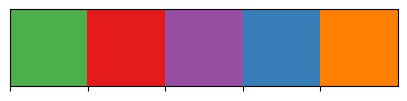

In [3]:
palette = ['#FFD166','#5E819D', 
           '#FF6F61','#8F3985','#A2A18F',
           '#3C6E71','#D5AB9C',
           '#7D9EA8','#D9BF77','#7A9D7E',
           '#EAD3C6','#6C5B7B','#355C7D','#ACD8AA','#FFE156',
           '#A8D0DB',
           '#63774D','#6B4226','#F0B8A6',
          ]

# palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
# palette = ['#e377c2', '#8c564b', '#17becf', '#bcbd22', '#7f7f7f']
# palette = ['#ff6347', '#4682b4', '#32cd32', '#ffd700', '#8a2be2']
# palette = ['#f08080', '#20b2aa', '#dda0dd', '#ff4500', '#5f9ea0']
# palette = ['#ff1493', '#00fa9a', '#4169e1', '#ffa500', '#800080']
# palette = ['#ff8c00', '#00ced1', '#7b68ee', '#adff2f', '#db7093']
# palette = ['#4b0082', '#ff69b4', '#2e8b57', '#87ceeb', '#daa520']
# palette = ['#b22222', '#00bfff', '#8b008b', '#3cb371', '#ffa07a']
# palette = ['#dc143c', '#4682b4', '#00ff7f', '#ffa500', '#9370db']
# palette = ['#006400', '#ff00ff', '#6495ed', '#ff4500', '#708090']
# palette = ['#dc143c', '#4682b4', '#00ff7f', '#0F52BA', '#9370DB']

# https://colorbrewer2.org/#type=qualitative&scheme=Set1&n=5
# palette = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00']
palette = ['#4daf4a','#e41a1c','#984ea3','#377eb8','#ff7f00']

sns.palplot(palette)
plt.show()

In [4]:
def change_colors(ranges_dev, color_dictionary):
    color_dictionary_custom = {k: v for k, v in color_dictionary.items() if k in ranges_dev}
    sns.set_palette(color_dictionary_custom.values())
    sns.color_palette()

# all devices that will be used
# ranges_dev = [
#     'NVIDIA-P100', 'NVIDIA-V100', 'NVIDIA-A100', 
#     'NVIDIA-H100', 'AMD-MI250', 
#     'AMD-EPYC-24', 'AMD-EPYC-64', 
#     'INTEL-XEON-14', 'INTEL-ICY-16', 'INTEL-SAPPHIRE-56',
#     'ARM-NEON-80', 'ARM-GRACE-72', 
#     'IBM-POWER9-32'
# ]
ranges_dev = ['NVIDIA-H100', 'AMD-MI250','AMD-EPYC-64','INTEL-SAPPHIRE-56','ARM-GRACE-72']
ranges_dev_backup = ranges_dev

color_dictionary = dict(zip(ranges_dev, palette[:len(ranges_dev)]))

# sns.set_palette(color_dictionary.values())
# sns.color_palette()


In [5]:
change_colors(ranges_dev, color_dictionary)
sns.color_palette()

[(0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (1.0, 0.4980392156862745, 0.0)]

# Load any global variables (and functions) from pickle object (defined in benchmark_aggregation)
## (need to move color palette here, as well as dictionary device->color)

In [6]:
# Load the objects from the file
with open('objects.pkl', 'rb') as f:
    objects_to_load = pickle.load(f)

ranges_dev = objects_to_load['ranges_dev']
ranges_dev_backup = objects_to_load['ranges_dev_backup']
y_limit_dictionary = objects_to_load['y_limit_dictionary']
llc_thresholds = objects_to_load['llc_thresholds']
ranges_impl_arch = objects_to_load['ranges_impl_arch']
ranges_impl_arch_backup = objects_to_load['ranges_impl_arch_backup']
ranges_memr = objects_to_load['ranges_memr']
ranges_anr = objects_to_load['ranges_anr']
ranges_skew = objects_to_load['ranges_skew']
ranges_ann = objects_to_load['ranges_ann']
ranges_crs = objects_to_load['ranges_crs']
ranges_size = objects_to_load['ranges_size']
ranges_regularity = objects_to_load['ranges_regularity']
cat_list = objects_to_load['cat_list']
ranges_list = objects_to_load['ranges_list']

# functions
set_category = objects_to_load['set_category']
set_category2 = objects_to_load['set_category2']
filter_ranges_impl_arch = objects_to_load['filter_ranges_impl_arch']
calculate_format_wins = objects_to_load['calculate_format_wins']

---
# validation real matrices dataframes

In [7]:
groupvalreps = pd.read_csv('validation_real_benchmarks_all-devices_all.csv')
print('groupvalreps:', groupvalreps.shape)
group_val_system_best = pd.read_csv('validation_real_all-devices_best-of.csv')
print('group_val_system_best:', group_val_system_best.shape)

groupvalreps: (4228, 32)
group_val_system_best: (674, 32)


# validation-friends dataframes

In [8]:
groupreps = pd.read_csv('validation_friends_benchmarks_all-devices_all.csv')
print('groupreps:', groupreps.shape)
group_system_best = pd.read_csv('validation_friends_benchmarks_all-devices_best-of.csv')
# group_system_best = pd.read_csv('validation_friends_benchmarks_all-devices_top2.csv')
# group_system_best = pd.read_csv('validation_friends_benchmarks_all-devices_top3.csv')
# group_system_best = pd.read_csv('validation_friends_benchmarks_all-devices_top4.csv')
# group_system_best = pd.read_csv('validation_friends_benchmarks_all-devices_top5.csv')
print('group_system_best:', group_system_best.shape)

groupreps: (268041, 30)
group_system_best: (41824, 30)


---

In [9]:
# original for IEEE paper
width = 3.487
height = width/1.618

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams.update({'font.size': 7})

# begin plotting (perhaps figure size needs refinement, you know better)

# find at least 'threshold' twins for each validation matrix
## set threshold = -1 to skip trying 

In [10]:
# threshold = -1
threshold = 10

def get_em_feats(pcg, features, dataframe, row, threshold=1):
    low = 1 - pcg*0.01
    high = 1 + pcg*0.01
    first = True
    feature_boolean = True
    for i in range(len(features)):
        feature = features[i]
        feature_boolean_tmp = feature_boolean &\
                              (dataframe[feature] <= row[feature]*high) &\
                              (dataframe[feature] >= row[feature]*low)

        isol = dataframe[feature_boolean_tmp]
        # try to find twins only when skew value is low. in these ranges, skew value doesn't matter that much...
        skew_threshold = 5 # try it with 10 sometimes too!
        if(feature == 'skew' and row[feature] < skew_threshold):
            feature_boolean_tmp = feature_boolean &\
                                  (dataframe[feature] <= row[feature]+skew_threshold) &\
                                  (dataframe[feature] >= row[feature]-skew_threshold)
            isol = dataframe[feature_boolean_tmp]

        pcg2_limit = 45
        pcg2 = pcg
        if((feature == 'avg_num_neighbours') or (feature == 'cross_row_similarity')):
            while(isol.shape[0]<threshold):
                # print('mpainw regularity', feature)
                pcg2 = pcg2+1
                if((feature == 'avg_num_neighbours' and pcg2>pcg2_limit) or (feature == 'cross_row_similarity' and pcg2>pcg2_limit)):
                    # print(f'efuga apo regularity({feature})@({pcg2}) psaxnontas gia value {row[feature]}')
                    break
                low2 = 1 - pcg2*0.01
                high2 = 1 + pcg2*0.01
                feature_boolean_tmp = feature_boolean &\
                                      (dataframe[feature] <= row[feature]*high2) &\
                                      (dataframe[feature] >= row[feature]*low2)
                isol = dataframe[feature_boolean_tmp]
            # if at first you fail... fail again, but better
            reg_threshold = 0.04
            if((row[feature] < 0.1) and (isol.shape[0]<threshold)):
                feature_boolean_tmp = feature_boolean &\
                                      (dataframe[feature] <= row[feature]+reg_threshold) &\
                                      (dataframe[feature] >= row[feature]-reg_threshold)
                isol = dataframe[feature_boolean_tmp]

        # if(pcg2!=pcg):
        #     if(feature=='skew'):
        #         print('\n',feature, '\t\t', pcg,'->', pcg2, '\t', row['matrix_name'],'\t', row[feature])
        #     else:
        #         print('\n',feature, '\t', pcg,'->', pcg2, '\t', row['matrix_name'],'\t', row[feature])
        #     if(feature !='nr_rows'):# and feature !='avg_nnz_per_row'):
        #         print(row['matrix_name'], features[i], row[feature], isol.shape)
        #         print(sorted(set([x for x in isol[feature]])))
        #     if(feature !='nr_rows'):
        #         if(i<len(features)-1):
        #             print('\t', features[i+1], sorted(set([np.round(x,2) for x in isol[features[i+1]]])), '\n')

        feature_boolean = feature_boolean_tmp
    similar_synthetic = dataframe[feature_boolean]
    return similar_synthetic

# Roofline Stuff (maybe not needed)

In [11]:
def flops_per_byte_spmv_csr(m,n,nnz,dsize,idxdsize):
    return 2.0 * nnz / (dsize*(m+n+nnz) + idxdsize*(m+1 + nnz)) 

group_val_system_best['flops_per_byte'] = flops_per_byte_spmv_csr(group_val_system_best['nr_rows'], group_val_system_best['nr_cols'], group_val_system_best['nr_nzeros'], 8, 4)
group_val_system_best['gflops_cache_roof'] = group_val_system_best['flops_per_byte']*group_val_system_best['cache_bw_gbytes_s']
group_val_system_best['gflops_mem_roof'] = group_val_system_best['flops_per_byte']*group_val_system_best['mem_bw_gbytes_s']
group_val_system_best.loc[(group_val_system_best['gflops'])<=0, ['gflops_mem_roof']] = -10
group_val_system_best.loc[(group_val_system_best['gflops'])<=0, ['gflops_cache_roof']] = -10
# print(group_val_system_best)   

# Plotting time ... 

In [12]:
llc_threshold = {'AMD-EPYC-64': 256, 'INTEL-SAPPHIRE-56': 105, 'ARM-GRACE-72': 114}
def process_system_matrices(system, validation_system, friends_system):
    arch = list(set(validation_system['Arch']))[0]
    val_md_list = []
    similar_synthetic_list = []

    sum_of_MAPES, sum_of_friends = 0, 0
    for index, row in validation_system.iterrows():
        pd.options.mode.chained_assignment = None  # default='warn'
        pcg = 30 # +-30%
        # features to consider too : 'nr_nzeros', 'std_nnz_per_row', 'avg_bw_scaled'
        features = ['nr_rows', 'avg_nnz_per_row', 'skew', 'cross_row_similarity', 'avg_num_neighbours']
        
        # Try to find at least 10 similar_synthetic matrices in artificial/friends dataset
        threshold = 10
        similar_synthetic = get_em_feats(pcg, features, friends_system, row, threshold)
        
        switch = 1
        if(switch):
            if(arch == 'CPU'):
                total_mf = row['mem_footprint'] + row['nr_rows']*8/(1024*1024.0) + row['nr_cols']*8/(1024*1024.0)
                if(total_mf < llc_threshold[system]):
                    before = similar_synthetic.shape[0]
                    similar_synthetic = similar_synthetic[similar_synthetic['mem_footprint'] < llc_threshold[system]]
                    after = similar_synthetic.shape[0]
                    # if(before!=after):
                    #     print('>>> 1 BEFORE', before, '\tAFTER ', after)
                
                if(total_mf > llc_threshold[system]):
                    before = similar_synthetic.shape[0]
                    similar_synthetic = similar_synthetic[similar_synthetic['mem_footprint'] > llc_threshold[system]]
                    after = similar_synthetic.shape[0]
                    # if(before!=after):
                    #     print('>>> 2 BEFORE', before, '\tAFTER ', after)

        # Adds format_name and num of friends in name
        matrix_name_ext = f'{row['matrix_name']} ({row['format_name']} - {similar_synthetic.shape[0]})'
        #similar_synthetic['matrix_name'] = matrix_name_ext 
        similar_synthetic['matrix_name'] = row['matrix_name']

        # box_stats are only useful for 'min' and 'max'.  (https://www.adamsmith.haus/python/docs/matplotlib.cbook.boxplot_stats)
        # for 'mean' and 'median', same values as simple queries to dataframe are returned
        box_stats = boxplot_stats(similar_synthetic['gflops'])[0]
        synth_mean = box_stats['mean'] # similar_synthetic['gflops'].mean()
        synth_median = box_stats['med'] # similar_synthetic['gflops'].median()
        # these two are the 'whiskers' of the boxplot, excluding outliers from min and max
        synth_min = box_stats['whislo']
        synth_max = box_stats['whishi']

        if(row['gflops']>0):
            diff_mean = (synth_mean - row['gflops'])/row['gflops'] *100
            diff_median = (synth_median - row['gflops'])/row['gflops'] *100
            diff_min = (synth_min - row['gflops'])/row['gflops'] *100
            diff_max = (synth_max - row['gflops'])/row['gflops'] *100
            
            # old MAPE
            # diff_MAPE = abs(synth_mean - row['gflops'])/row['gflops'] *100
            synthetic_gflops = list(similar_synthetic['gflops'])
            summ=0
            for sg in synthetic_gflops:
                summ += abs((row['gflops']-sg)/row['gflops'])
            if(len(synthetic_gflops)>0):
                diff_MAPE = 100*summ/(similar_synthetic.shape[0])
                sum_of_MAPES += 100*summ
                sum_of_friends += similar_synthetic.shape[0]
                # print(row['matrix_name'], similar_synthetic.shape[0])
            else:
                diff_MAPE = 0
            
            diff_best_friend_APE = 10000000
            if(len(synthetic_gflops)>0):
                for index, friend_matrix in similar_synthetic.iterrows():
                    temp_diff_best_friend_APE = abs(friend_matrix['gflops'] - row['gflops'])/row['gflops'] *100
                    if diff_best_friend_APE > temp_diff_best_friend_APE:
                        diff_best_friend_APE = temp_diff_best_friend_APE
            else:
                diff_best_friend_APE = -1
        else:
            diff_mean, diff_median, diff_min, diff_max, diff_MAPE, diff_best_friend_APE = 0,0,0,0,0,0
        
        # print(similar_synthetic.shape[0], '\t', row['matrix_name'], np.round(row['mem_footprint']), 'MB\t(', np.round(diff_MAPE,2), ',', np.round(diff_best_friend_APE,2),')\t', np.round(row['gflops']), '\t', sorted(set(list(np.round(similar_synthetic['gflops'],-1)))))

        val_md =  [row['matrix_name'], row['gflops'], 
                   similar_synthetic['gflops'].mean(), similar_synthetic['gflops'].median(), similar_synthetic['gflops'].min(), similar_synthetic['gflops'].max(), 
                   diff_mean, diff_median, diff_min, diff_max, diff_MAPE, diff_best_friend_APE]

        if similar_synthetic.empty:
            similar_synthetic = pd.DataFrame([[matrix_name_ext] + [0]*(len(friends_system.columns)-1)], columns = friends_system.columns)
            # if no 'similar_synthetic' are found, don't plot the real one either (no point, it just destroys your APE numbers and need manual fixing later)
            validation_system.loc[(validation_system['matrix_name'] == row['matrix_name']), ['gflops_mem_roof']] = -10
            validation_system.loc[(validation_system['matrix_name'] == row['matrix_name']), ['gflops_cache_roof']] = -10
            validation_system.loc[(validation_system['matrix_name'] == row['matrix_name']), ['gflops']] = -10
            
        if(row['gflops']<0):
            similar_synthetic = pd.DataFrame([[matrix_name_ext] + [0]*(len(friends_system.columns)-1)], columns = friends_system.columns)

        similar_synthetic_list.append(similar_synthetic)
        # print(row['matrix_name'], similar_synthetic.columns)
        val_md_list.append(val_md)
    
    if(sum_of_friends==0):
        device_MAPE = 0
    else:
        device_MAPE = np.round(sum_of_MAPES / sum_of_friends,2)
    print(system,'\t->\t', device_MAPE)

    # for i in similar_synthetic_list:
    #     print(i.shape[0])
    # synthetic_neighbors = pd.DataFrame(similar_synthetic_list, columns=list(similar_synthetic.columns))
    synthetic_neighbors = pd.concat(similar_synthetic_list, ignore_index=True)
    validation_metadata = pd.DataFrame(val_md_list, columns=['matrix_name', 'val_gflops', 'synth_mean', 'synth_median', 'synth_min', 'synth_max', 'diff_median', 'diff_mean', 'diff_min', 'diff_max', 'diff_MAPE', 'diff_best_friend_APE'])
    
    return synthetic_neighbors, validation_metadata


In [13]:
%%time

def plot_validation(ranges_dev, group_val_system_best, group_system_best, exclude_matrices):
    validation_metadata_systems = []
    font = 7
    ctr = 0
    plot_x_axis, plot_y_axis = 'matrix_name', 'gflops'
    # plot_y_axis_memroof, plot_y_axis_cacheroof = 'gflops_mem_roof', 'gflops_cache_roof'
    
    fig, axs = plt.subplots(len(ranges_dev))
    fig.subplots_adjust(left=.12, bottom=.17*(2/5)*(4/3.5), right=.99, top=.94)
    for system in ranges_dev:
        validation_system = group_val_system_best[group_val_system_best['System'] == system].sort_values('mem_footprint')
        friends_system = group_system_best[group_system_best['System'] == system]
        synthetic_neighbors, validation_metadata = process_system_matrices(system, validation_system, friends_system)
        
        sns_plot = sns.boxplot(data=synthetic_neighbors, x='matrix_name', y=plot_y_axis, ax=axs[ctr], fliersize = 0.3, linewidth = 0.3, color = color_dictionary[system],
                              # showfliers=False
                              )
                              # showmeans=True,meanprops={'marker':'s','markerfacecolor':'green', 'markeredgecolor':'blue','markersize':'2'})
        sns_plot = sns.stripplot(data=validation_system, x=plot_x_axis, y=plot_y_axis, ax=axs[ctr], color='k', jitter=True, s=3, alpha=0.75)
        
        # Plot "rooflines" for each device... Not that useful, moving on...
        # if system in ['AMD-EPYC-24', 'AMD-EPYC-64', 'INTEL-XEON-14', 'INTEL-ICY-16', 'INTEL-SAPPHIRE-56', 'ARM-NEON-80', 'ARM-GRACE-72', 'IBM-POWER9-32']:
        #     sns_plot_llc = sns.lineplot(data=validation_system, x=plot_x_axis, y=plot_y_axis_cacheroof, 
        #                             ax=axs[ctr], marker='X', markersize = 3, linestyle='', color = 'gray', markeredgewidth=0)
        # sns_plot_mem = sns.lineplot(data=validation_system, x=plot_x_axis, y=plot_y_axis_memroof, 
        #                             ax=axs[ctr], marker='^', markersize = 3, linestyle='', color = 'gray', markeredgewidth=0)

        arch = list(set(validation_system['Arch']))[0]
        if(arch == 'CPU'):
            xtick_items = axs[ctr].get_xticklabels()
            for item in xtick_items:
                matrix = item.get_text()
                matrix_entry = validation_system[validation_system['matrix_name']==matrix].squeeze()
                mem_foot = matrix_entry['mem_footprint'].squeeze() + matrix_entry['nr_rows'].squeeze()*8/(1024*1024) + matrix_entry['nr_cols'].squeeze()*8/(1024*1024)
                # mem_foot2 = validation_system.loc[validation_system['matrix_name'] == matrix, 'mem_footprint'].squeeze()
                # print(matrix, np.round(mem_foot,4), 'vs', mem_foot2)
                if(mem_foot > llc_threshold[system]):
                    # when surpassing the llc threshold, try 
                    print(f'Time to add a tiago splitter... matrix = {matrix}, mem_footprint = {mem_foot}')
                    pos = item.get_position()[0]-0.5
                    axs[ctr].axvline(x=pos, color='gray', linewidth=0.25)
                    break

        axs[ctr].tick_params(axis='both', which='major', labelsize= font-2)
        axs[ctr].tick_params(axis='both', which='minor', labelsize= font-2)
        axs[ctr].margins(x=0)
        if ctr == len(ranges_dev)//2:
            axs[ctr].set_ylabel('GFLOPs', fontsize = font-1)
        else:
            axs[ctr].set_ylabel('')
        
        if ctr == len(ranges_dev) - 1:
            axs[ctr].set_xlabel('Matrix Id (Table III)', fontsize = font-1)
            axs[ctr].set_xticks(axs[ctr].get_xticks())
            axs[ctr].set_xticklabels(xtick_labels, fontsize = font-2, rotation = 90)
        else:
            axs[ctr].set_xlabel('')
            xtick_labels = range(1,len(set(synthetic_neighbors['matrix_name']))+1)
            axs[ctr].set_xticks([])
            axs[ctr].set_xticklabels([])

        axs[ctr].set_ylim([0, axs[ctr].get_ylim()[1]*1.2])
        axs[ctr].text( 0.04, 0.85, ranges_dev[ctr], fontsize=font-1, transform = axs[ctr].transAxes, )
        
        validation_metadata_systems.append(validation_metadata)
        ctr+=1
        plt.xticks(rotation=90)
    
    plt.subplots_adjust(wspace=0, hspace=0)
    
    # Legendary stuff
    # import matplotlib.lines as mlines
    # mem_roof = mlines.Line2D([], [], color='gray', marker='^', markersize=3, linestyle = '--', linewidth = 0.4, label='Roofline Memory')
    # llc_roof = mlines.Line2D([], [], color='gray', marker='X', markersize=3, linestyle = '--', linewidth = 0.4, label='Roofline LLC')
    # axs[0].legend(handles=[mem_roof, llc_roof], bbox_to_anchor=(0., 1.0, 1., .102), loc=3, fontsize=6, ncol=2, mode='expand', borderaxespad=0., frameon=False)
    
    # for ratio in [0.8, 0.9, 1, 1.1, 1.2]:
    for ratio in [1.2]:
        fig.set_size_inches(width, 1.5*height/(2/5)*ratio*len(ranges_dev)/9)
        # plt.tight_layout()
        fig_name = './Plots/%s_%s_devices_Validation_merged-all_x-%s_y-%s.pdf' % (ratio, len(ranges_dev), plot_x_axis, plot_y_axis)
        fig.savefig(fig_name)
        plt.close()
        subprocess.run(['pdfcrop', fig_name], stdout = subprocess.DEVNULL, stderr = subprocess.DEVNULL)
        subprocess.run(['mv', fig_name.replace('.pdf', '-crop.pdf'), fig_name])

    return validation_metadata_systems

ranges_dev = ['NVIDIA-H100', 'AMD-MI250', 'AMD-EPYC-64', 'INTEL-SAPPHIRE-56', 'ARM-GRACE-72']
# ranges_dev = ['AMD-EPYC-64']
change_colors(ranges_dev, color_dictionary)

# exclude_matrices = [
#     'wikipedia-20051105','scircuit','mac_econ_fwd500','rail4284','circuit5M','conf5_4-8x8-15','rajat31','in-2004','eu-2005','TSOPF_RS_b300_c3','mip1','PR02R','Ga41As41H72','shipsec1','Si41Ge41H72','crankseg_2','TSOPF_RS_b2383',
#     'mc2depi','raefsky3','cop20k_A','bbmat','Chebyshev4','rma10','cage15','cant','pdb1HYS','consph','ldoor','pwtk','bone010' #,'webbase-1M'
# ]  
# validation_system = validation_system[~validation_system['matrix_name'].isin(exclude_matrices)]

# exclude_matrices = []
exclude_matrices = ['mawi_201512012345', 'kmer_V2a']  
group_val_system_best = group_val_system_best[~group_val_system_best['matrix_name'].isin(exclude_matrices)]

validation_metadata_systems = plot_validation(ranges_dev, group_val_system_best, group_system_best, exclude_matrices)


NVIDIA-H100 	->	 5.88
AMD-MI250 	->	 12.05
AMD-EPYC-64 	->	 15.44
Time to add a tiago splitter... matrix = wikipedia-20051105, mem_footprint = 257.2409522705078
INTEL-SAPPHIRE-56 	->	 14.08
Time to add a tiago splitter... matrix = CurlCurl_2, mem_footprint = 117.48465588378906
ARM-GRACE-72 	->	 14.67
Time to add a tiago splitter... matrix = CurlCurl_2, mem_footprint = 117.48465588378906
CPU times: user 3.55 s, sys: 37.9 ms, total: 3.59 s
Wall time: 3.88 s


---
# Print errors (MAPE and best-friend-APE)
## "validation_metadata_systems"  is a list of metadata for each system containing a dataframe with following columns
## ['mtx_name', 'val_gflops', 'synth_mean', 'synth_median', 'synth_min', 'synth_max', 'diff_median', 'diff_mean', 'diff_min', 'diff_max']


In [14]:
def keep_good_stuff(which_column, validation_metadata_systems):
    # tmp_validation_metadata_df = pd.DataFrame(columns=validation_headers)
    # testing = 'diff_median_'
    testing = ''
    for i in range(len(ranges_dev)):
        validation_metadata_systems_new = validation_metadata_systems[i].rename(columns={which_column:ranges_dev[i]}, inplace=False)
        if(i==0):
            tmp_validation_metadata_df = validation_metadata_systems_new # validation_metadata_systems[i]
        else:
            # validation_metadata_df = pd.concat([validation_metadata_df,validation_metadata_systems[i]], axis=1)
            # https://datacarpentry.org/python-socialsci/11-joins/index.html
            # tmp_validation_metadata_df = pd.merge(tmp_validation_metadata_df,validation_metadata_systems_backup[i], how='left', on = 'mtx_name')
            #/tmp/ipykernel_24490/4187708563.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'val_gflops_x', 'diff_max_x', 'synth_mean_x', 'diff_median_x', 'synth_max_x', 'diff_mean_x', 'diff_min_x', 'synth_min_x', 'synth_median_x'} in the result is deprecated and will raise a MergeError in a future version.
            # tmp_validation_metadata_df = pd.merge(tmp_validation_metadata_df,validation_metadata_systems[i], how='left', on = 'mtx_name') 
            tmp_validation_metadata_df = pd.merge(tmp_validation_metadata_df, 
                                                  validation_metadata_systems_new[[ranges_dev[i]]], 
                                                  left_index=True, right_index=True, how='outer')
    validation_metadata_df = tmp_validation_metadata_df[['matrix_name'] + [i for i in ranges_dev]]
    return validation_metadata_df


In [15]:
# keep only "diff_median" columns
# whichever column is selected, will be the only one printed afterwards
which_column = 'diff_MAPE'
validation_metadata_df = keep_good_stuff(which_column, validation_metadata_systems)
print(validation_metadata_df.columns)
display(validation_metadata_df)
validation_metadata_df.to_csv("%s_validation_vs_friends_MAPE.csv" % len(ranges_dev), sep ='\t')

for i in range(len(ranges_dev)):
    print(ranges_dev[i], round(validation_metadata_df[ranges_dev[i]].sum() / (validation_metadata_df[ranges_dev[i]]!=0).sum(),2))


Index(['matrix_name', 'NVIDIA-H100', 'AMD-MI250', 'AMD-EPYC-64',
       'INTEL-SAPPHIRE-56', 'ARM-GRACE-72'],
      dtype='object')


,matrix_name,NVIDIA-H100,AMD-MI250,AMD-EPYC-64,INTEL-SAPPHIRE-56,ARM-GRACE-72
0,scircuit,3.420354,10.815668,5.352366,8.018733,13.888546
1,mac_econ_fwd500,7.855386,12.883897,2.779777,3.791958,6.119888
2,raefsky3,4.157607,3.948200,2.933237,7.456940,3.139024
3,rgg_n_2_17_s0,10.007243,8.077342,4.838680,5.288441,4.392228
4,bbmat,8.920566,9.089035,2.712370,5.781504,7.789157
5,appu,4.149286,3.256175,1.948120,2.413163,7.460193
6,mc2depi,11.318086,9.565456,1.701390,7.793019,2.600746
7,rma10,8.925457,8.785440,7.556969,7.388496,7.068444
8,cop20k_A,7.640541,12.868880,12.501888,21.423810,3.623403
9,thermomech_dK,9.824591,3.464776,6.050969,13.234300,15.776438


NVIDIA-H100 5.96
AMD-MI250 11.4
AMD-EPYC-64 16.18
INTEL-SAPPHIRE-56 14.97
ARM-GRACE-72 15.21


In [16]:
which_column = 'diff_best_friend_APE'
validation_metadata_df = keep_good_stuff(which_column, validation_metadata_systems)
print(validation_metadata_df.columns)
display(validation_metadata_df)
validation_metadata_df.to_csv("%s_validation_vs_best_friend_APE.csv" % len(ranges_dev), sep ='\t')

for i in range(len(ranges_dev)):
    print(ranges_dev[i], round(validation_metadata_df[ranges_dev[i]].sum() / (validation_metadata_df[ranges_dev[i]]!=0).sum(),2))


Index(['matrix_name', 'NVIDIA-H100', 'AMD-MI250', 'AMD-EPYC-64',
       'INTEL-SAPPHIRE-56', 'ARM-GRACE-72'],
      dtype='object')


,matrix_name,NVIDIA-H100,AMD-MI250,AMD-EPYC-64,INTEL-SAPPHIRE-56,ARM-GRACE-72
0,scircuit,0.032418,0.851418,0.593294,0.166852,2.345959
1,mac_econ_fwd500,0.075761,1.685357,0.092736,0.091813,0.843093
2,raefsky3,0.454137,0.299003,0.137808,0.480990,0.015832
3,rgg_n_2_17_s0,4.783700,0.301317,0.014657,1.408696,0.155580
4,bbmat,0.014884,0.031990,0.005955,0.092153,0.119939
5,appu,0.038156,0.057730,0.085862,0.026560,0.168453
6,mc2depi,2.473816,0.394287,0.029634,1.115011,0.059805
7,rma10,0.206130,0.101763,1.040075,0.312432,0.013884
8,cop20k_A,0.306788,1.305560,0.011253,1.143140,0.043075
9,thermomech_dK,1.170683,0.153874,0.267679,0.373959,2.609770


NVIDIA-H100 1.43
AMD-MI250 4.65
AMD-EPYC-64 7.08
INTEL-SAPPHIRE-56 4.55
ARM-GRACE-72 6.46


---
# Generate a LaTeX table with the validation matrices for the paper

In [17]:
def generate_latex_table(df, output_file=None):
    matrix_dict = {}
    # LaTeX table header
    latex_table = r"""
% \begin{tabular}{|r|l|r|r|r|r|}
\begin{tabular}{rlrrrr}
    \toprule
    \rowcolor{backcolour}
% f1 : matrix memory footprint
% f2 : number of rows
% f3 : average nonzeros per row
% f4 : skew coefficient
% f5 : cross row similarity
% f6 : average number of neighbors
    \textbf{ID} & \textbf{Matrix} & \textbf{f1} & \textbf{f2} & \textbf{f3} & \textbf{f4} \\
    \midrule
"""
    # Add rows dynamically from DataFrame
    cnt = 1
    for _, row in df.iterrows():
        curr_line = "        " + f"{int(cnt)} & {row['matrix_name'].replace('_', r'\_')} & {row['mem_footprint']:.2f} & {row['avg_nnz_per_row']:.2f} & {row['skew']:.2f} & {row['regularity']} \\\\\n"
        matrix_dict[row['matrix_name']] = cnt
        latex_table += curr_line
        cnt+=1

    # Add closing lines
    latex_table += r"""    \bottomrule
\end{tabular}
"""

    # Optionally save to a file
    if output_file:
        with open(output_file, 'w') as f:
            f.write(latex_table)
    return latex_table, matrix_dict

def add_extra_columns(df, ranges_crs, ranges_ann, ranges_size):
    df['crs_categ'] = df.apply(lambda row: set_category(row['cross_row_similarity'], ranges_crs, ranges_size, ranges_size_flag=True), axis=1)
    df['ann_categ'] = df.apply(lambda row: set_category(row['avg_num_neighbours'], ranges_ann, ranges_size, ranges_size_flag=True), axis=1)
    df['regularity'] = df['crs_categ'] + df['ann_categ']
    return df
# 
df = group_val_system_best[group_val_system_best['System']=='NVIDIA-H100'].sort_values('mem_footprint')
df = df[~df['matrix_name'].isin(['mawi_201512012345', 'kmer_V2a'])]
df = add_extra_columns(df, ranges_crs, ranges_ann, ranges_size)
latex_output, matrix_dict = generate_latex_table(df)
print(latex_output)



% \begin{tabular}{|r|l|r|r|r|r|}
\begin{tabular}{rlrrrr}
    \toprule
    \rowcolor{backcolour}
% f1 : matrix memory footprint
% f2 : number of rows
% f3 : average nonzeros per row
% f4 : skew coefficient
% f5 : cross row similarity
% f6 : average number of neighbors
    \textbf{ID} & \textbf{Matrix} & \textbf{f1} & \textbf{f2} & \textbf{f3} & \textbf{f4} \\
    \midrule
        1 & scircuit & 11.63 & 5.61 & 61.95 & LS \\
        2 & mac\_econ\_fwd500 & 15.36 & 6.17 & 6.14 & SS \\
        3 & raefsky3 & 17.12 & 70.22 & 0.14 & LL \\
        4 & rgg\_n\_2\_17\_s0 & 17.18 & 11.12 & 1.52 & SS \\
        5 & bbmat & 20.42 & 45.73 & 1.76 & LL \\
        6 & appu & 21.26 & 132.36 & 1.22 & SS \\
        7 & mc2depi & 26.04 & 3.99 & 0.00 & LS \\
        8 & rma10 & 27.35 & 50.69 & 1.86 & LL \\
        9 & cop20k\_A & 30.50 & 21.65 & 2.74 & LL \\
        10 & thermomech\_dK & 33.35 & 13.93 & 0.44 & LL \\
        11 & webbase-1M & 39.35 & 3.11 & 1512.43 & LS \\
        12 & cant & 46.10 & 64.17 

---
# For journal extra section...

In [18]:
format_name_mapping = {
    'cuSPARSE_csr11': 'cu-CSR',
    'cuSPARSE_coo11': 'cu-COO',
    'cuSPARSE_hyb9-2': 'cu-HYB',
    'CUSPARSE_CSR': 'cu-CSR',
    'CUSPARSE_COO': 'cu-COO',

    'ROCSPARSE_CSR': 'roc-CSR',
    'ROCSPARSE_COO': 'roc-COO',
    'ROCSPARSE_HYB': 'roc-HYB',

    'Merge_11': 'Merge-CSR',
    'MERGE_CUDA': 'Merge-CSR',
    'MERGE': 'Merge-CSR',

    'Custom_CSR_CUDA_ADAPTIVE_b512_1': 'Ada-CSR',
    'Custom_CSR_CUDA_ADAPTIVE_b256_1': 'Ada-CSR',
    'Custom_CSR_ROCM_ADAPTIVE_b512_1': 'Ada-CSR',

    # 'Custom_CSR_CUDA_VECTOR_b512': 'Vec-CSR',
    'Custom_CSR_CUDA_VECTOR_b256': 'Vec-CSR',
    'Custom_CSR_ROCM_VECTOR_b512': 'Vec-CSR',

    'Custom_CSR_CUDA_constant_nnz_per_thread_b1024_nnz4': 'Custom-CSR',
    'Custom_CSR_ROCM_constant_nnz_per_thread_b512_nnz4': 'Custom-CSR',

    'ACC_LINE_ENHANCE_b512': 'ACC-Line',
    'ACC_FLAT_b512': 'ACC-Flat',

    'SELL-32-1': 'SELL-C-σ',
    # 'SELL-32-512': 'SELL-C-σ',

    'Naive_CSR_CPU': 'Naive-CSR',
    'Custom_CSR_B': 'Bal-CSR',
    'Custom_CSR_BV_x86': 'Vec-CSR',
    'Custom_CSR_BV_SVE': 'Vec-CSR',

    'MKL_IE': 'MKL-IE',
    'AOCL_OPTMV': 'AOCL',
    'ARMPL': 'ARM-lib',

    'SparseX': 'SparseX',
    'CSR5_9': 'CSR5',
    'CSR5_CUDA': 'CSR5',
    'CSR5': 'CSR5',
    'DASP_CUDA': 'DASP',
    'LCM': 'LCM',
}
groupvalreps['format_name'] = groupvalreps['format_name'].replace(format_name_mapping)

---
## Memory footprint and CPU (ARM-lib vs SparseX, Dictionary)

In [19]:
cd_val = ['#4daf4a','#e41a1c','#377eb8','#ff7f00'] # '#984ea3'
cd_val = [sns.desaturate(x, 0.6) for x in cd_val]

sns.set_palette(cd_val)


def plot_footprint_cpu(df, matrix_dict):
    fig, ax = plt.subplots(figsize=(width,height))
    gap = 1  # Define the gap size
    x = np.arange(len(df['matrix']), dtype=float)  # the label locations
    x[:10] = x[:10]  # First group unchanged
    x[10:] += gap  # Add a gap to the second group
    
    bar_width = 0.25  # width of each bar
    
    ax.bar(x - bar_width, df['armpl'], bar_width, label='Baseline (ARM-lib)')
    ax.bar(x, df['sparsex'], bar_width, label='SparseX')
    ax.bar(x + bar_width, df['dictionary'], bar_width, label='Dictionary')
    
    ax.set_xlabel('Matrix ID (Table III)')
    ax.set_ylabel('GFLOPs')
    ax.set_xticks(x)
    x_dict = [matrix_dict[xx] for xx in df['matrix']]
    ax.set_xticklabels(x_dict, rotation=90)
    ax.axvline(x=9.5 + gap / 2, color='black', linestyle='--', linewidth=0.8)
    
    # Position the legend on top, centered, outside the plot
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, frameon=False)
    plt.tight_layout()
    fig_name = './Plots/footprint_and_cpus.pdf'
    fig.savefig(fig_name)
    plt.close()
    subprocess.run(['pdfcrop', fig_name], stdout = subprocess.DEVNULL, stderr = subprocess.DEVNULL)
    subprocess.run(['mv', fig_name.replace('.pdf', '-crop.pdf'), fig_name])


matrix_order = ['TSOPF_RS_b300_c3','Chebyshev4','consph','com-Youtube','radiation','Stanford_Berkeley','shipsec1','PR02R','CurlCurl_2','gupta3',
                'TSOPF_RS_b2383','in-2004','Ga41As41H72','rajat31','ldoor','circuit5M','soc-LiveJournal1','bone010','audikw_1','cage15']

df = pd.read_csv('footprint_and_cpus.csv')
df = df.groupby('matrix', as_index=False).mean()
df = df.set_index('matrix').reindex(matrix_order).reset_index()
# display(df)

plot_footprint_cpu(df, matrix_dict)

change_colors(ranges_dev, color_dictionary)
sns.color_palette()


[(0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (1.0, 0.4980392156862745, 0.0)]

In [20]:
extra_df = pd.read_csv('focus_on_footprint.csv')
df = pd.merge(df, extra_df, on='matrix')

formats = ['sparsex', 'dictionary',]
df['bestof (sparsex, dictionary)'] = df[formats].max(axis=1)
df['bestof format'] = df[formats].idxmax(axis=1)
df['perf improvement (%)'] = ((df['bestof (sparsex, dictionary)'] - df['armpl']) / df['armpl']) * 100
df['compression better?'] = df.apply(lambda row: 'yes' if row['bestof (sparsex, dictionary)'] > row['armpl'] else 'NO', axis=1)
df['sparsex perf change (%)'] = ((df['sparsex'] - df['armpl']) / df['armpl']) * 100
df['dictionary perf change (%)'] = ((df['dictionary'] - df['armpl']) / df['armpl']) * 100

df['arm_over_best'] = df['armpl'] / df['bestof (sparsex, dictionary)']
df['best_over_arm'] = df['bestof (sparsex, dictionary)'] / df['armpl']

small_matrices = df.head(10)
display(small_matrices)
print(f"sparsex footprint decrease (%): {small_matrices['sparsex footprint decrease (%)'].mean().round(2)}")
print(f"dictionary footprint decrease (%): {small_matrices['dictionary footprint decrease (%)'].mean().round(2)}")
print(f"perf improvement (%): {small_matrices['perf improvement (%)'].mean().round(2)}")
print(f"ARM over best: {small_matrices['arm_over_best'].mean().round(2)}")
print(f"best over ARM: {small_matrices['best_over_arm'].mean().round(2)}")

large_matrices = df.tail(10)
display(large_matrices)
print(f"sparsex footprint decrease (%): {large_matrices['sparsex footprint decrease (%)'].mean().round(2)}")
print(f"dictionary footprint decrease (%): {large_matrices['dictionary footprint decrease (%)'].mean().round(2)}")
print(f"perf improvement (%): {large_matrices['perf improvement (%)'].mean().round(2)}")
print(f"ARM over best: {large_matrices['arm_over_best'].mean().round(2)}")
print(f"best over ARM: {large_matrices['best_over_arm'].mean().round(2)}")


,matrix,armpl,sparsex,dictionary,original mem footprint,original nonzeros,sparsex mem footprint,sparsex footprint decrease (%),dictionary UV (%),dictionary unique values,dictionary mem footprint,dictionary footprint decrease (%),"bestof (sparsex, dictionary)",bestof format,perf improvement (%),compression better?,sparsex perf change (%),dictionary perf change (%),arm_over_best,best_over_arm
0,TSOPF_RS_b300_c3,237.594025,174.438446,93.583910,50.67,4413449,34.14,32.62,2.000000,92313,34.54,31.84,174.438446,sparsex,-26.581299,NO,-26.581299,-60.611842,1.362051,0.734187
1,Chebyshev4,238.979098,101.423584,43.900128,61.80,5377761,47.01,23.93,29.000000,1550644,53.12,14.05,101.423584,sparsex,-57.559642,NO,-57.559642,-81.630139,2.356248,0.424404
2,consph,247.674786,156.871266,49.427674,69.10,6010480,48.83,29.34,26.000000,1574940,58.19,15.79,156.871266,sparsex,-36.662400,NO,-36.662400,-80.043316,1.578841,0.633376
3,com-Youtube,40.551240,25.587021,39.263086,72.71,5975248,65.07,10.51,0.000017,1,49.92,31.35,39.263086,dictionary,-3.176608,NO,-36.902000,-3.176608,1.032808,0.968234
4,radiation,181.430174,102.469365,40.384893,88.26,7637688,83.37,5.53,41.000000,3098573,82.76,6.23,102.469365,sparsex,-43.521322,NO,-43.521322,-77.740807,1.770580,0.564787
5,Stanford_Berkeley,127.153141,55.070962,114.959725,89.39,7583376,65.95,26.22,0.000013,1,60.46,32.36,114.959725,dictionary,-9.589552,NO,-56.689263,-9.589552,1.106067,0.904104
6,shipsec1,250.804112,145.580388,117.007889,89.95,7813404,61.46,31.67,2.000000,153383,61.32,31.83,145.580388,sparsex,-41.954545,NO,-41.954545,-53.346901,1.722788,0.580455
7,PR02R,240.252076,140.098465,44.478348,94.29,8185136,75.41,20.02,96.000000,7897405,123.31,-30.79,140.098465,sparsex,-41.686887,NO,-41.686887,-81.486800,1.714880,0.583131
8,CurlCurl_2,233.361344,68.356353,156.963502,105.18,8921789,81.96,22.07,0.015800,1411,71.16,32.35,156.963502,dictionary,-32.738002,NO,-70.707936,-32.738002,1.486724,0.672620
9,gupta3,242.893874,166.066899,183.757060,106.76,9323427,78.31,26.65,0.000011,1,71.20,33.31,183.757060,dictionary,-24.346770,NO,-31.629853,-24.346770,1.321821,0.756532


sparsex footprint decrease (%): 22.86
dictionary footprint decrease (%): 19.83
perf improvement (%): -31.78
ARM over best: 1.55
best over ARM: 0.68


,matrix,armpl,sparsex,dictionary,original mem footprint,original nonzeros,sparsex mem footprint,sparsex footprint decrease (%),dictionary UV (%),dictionary unique values,dictionary mem footprint,dictionary footprint decrease (%),"bestof (sparsex, dictionary)",bestof format,perf improvement (%),compression better?,sparsex perf change (%),dictionary perf change (%),arm_over_best,best_over_arm
10,TSOPF_RS_b2383,159.670970,199.981971,42.689493,185.21,16171169,124.21,32.93,5.000000,762680,129.34,30.17,199.981971,sparsex,25.246293,yes,25.246293,-73.264086,0.798427,1.252463
11,in-2004,103.788117,57.155324,117.037943,198.88,16917053,142.85,28.17,0.000006,1,134.34,32.45,117.037943,dictionary,12.766227,yes,-44.930763,12.766227,0.886790,1.127662
12,Ga41As41H72,119.046889,120.178899,49.374430,212.61,18488476,159.75,24.86,19.000000,3597854,169.53,20.26,120.178899,sparsex,0.950894,yes,0.950894,-58.525225,0.990581,1.009509
13,rajat31,69.632332,31.745542,119.542254,250.39,20316253,176.66,29.45,0.019600,3985,172.92,30.94,119.542254,dictionary,71.676361,yes,-54.409767,71.676361,0.582491,1.716764
14,ldoor,67.483531,94.538122,16.616451,536.04,46522475,359.76,32.89,47.000000,21675099,523.94,2.26,94.538122,sparsex,40.090658,yes,40.090658,-75.377028,0.713823,1.400907
15,circuit5M,54.059404,44.074775,81.042328,702.40,59524291,471.51,32.87,0.071800,42756,475.66,32.28,81.042328,dictionary,49.913470,yes,-18.469736,49.913470,0.667051,1.499135
16,soc-LiveJournal1,30.310694,24.296331,38.158447,808.06,68993773,785.05,2.85,0.000001,1,544.87,32.57,38.158447,dictionary,25.891040,yes,-19.842378,25.891040,0.794338,1.258910
17,bone010,81.420507,86.803026,171.439642,823.92,71666325,570.48,30.76,0.000053,38,550.53,33.18,171.439642,dictionary,110.560765,yes,6.610766,110.560765,0.474922,2.105608
18,audikw_1,60.652542,84.747277,12.285749,892.25,77651847,628.82,29.53,48.000000,37023578,878.50,1.54,84.747277,sparsex,39.725846,yes,39.725846,-79.744050,0.715687,1.397258
19,cage15,55.255398,50.162273,89.178448,1154.91,99199551,951.32,17.63,0.000544,540,776.50,32.77,89.178448,dictionary,61.393188,yes,-9.217425,61.393188,0.619605,1.613932


sparsex footprint decrease (%): 26.19
dictionary footprint decrease (%): 24.84
perf improvement (%): 43.82
ARM over best: 0.72
best over ARM: 1.44


---
## Irregularity and GPU (cuSPARSE-CSR and colind[0-16]) + reordering methods)

In [21]:
# def lighten_color(color, amount=1.6):
#     """
#     Lightens the given color by multiplying (1-luminosity) by the given amount.
#     Input can be matplotlib color string, hex string, or RGB tuple.

#     Examples:
#     >> lighten_color('g', 0.3)
#     >> lighten_color('#F034A3', 0.6)
#     >> lighten_color((.3,.55,.1), 0.5)
#     """
#     import matplotlib.colors as mc
#     import colorsys
#     try:
#         c = mc.cnames[color]
#     except:
#         c = color
#     c = colorsys.rgb_to_hls(*mc.to_rgb(c))
#     return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])


# color_sys = color_dictionary[system]
# col_palette = list(map(lambda x: sns.desaturate(x,0.9), [lighten_color(color_sys, 0.6), lighten_color(color_sys, 1.3)]))

# color_dictionary
# sns.set_palette(col_palette)
# sns.color_palette()

In [22]:
cd_val = ['#4daf4a','#e41a1c','#377eb8','#ff7f00'] # '#984ea3'
cd_val = [sns.desaturate(x, 0.6) for x in cd_val]

sns.set_palette(cd_val)
#######################################################################################################################
def plot_irregularity_gpu_preliminary(df, matrix_dict, regular_matrices, irregular_matrices):
    # Melt the DataFrame to long format
    df_long = speedup_df.melt(id_vars=['matrix'], var_name='x_tick', value_name='value')

    ratio = 1.25
    fig, ax = plt.subplots(figsize=(ratio*width, ratio*height))
    markers = {'solid': 'o', 'dotted': 'D'}
    # Loop through each matrix and plot with different styles
    for matrix in df['matrix']:
        matrix_data = df_long[df_long['matrix'] == matrix]
        line_style = 'dotted' if matrix in regular_matrices else 'solid'
        # Determine line style and marker
        if matrix in regular_matrices:
            linestyle = 'dotted'
            marker = 'D'
            label = f"{matrix} (Dotted)"
        else:
            linestyle = 'solid'
            marker = 'o'
            label = f"{matrix} (Solid)"

        sns.lineplot(data=matrix_data, x='x_tick', y='value', label=matrix, linestyle=line_style, marker=marker, linewidth=1.2)
    
    # Customize the plot
    # plt.title('Lineplot of Matrices with X-Ticks as Columns')
    plt.xlabel('Column distance of consecutive nonzeros')
    plt.ylabel('Speedup over original')
    # plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    # plt.legend(title='Matrices', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside the plot
    
    # Position the legend on top, centered, outside the plot
    ax.legend()
    handles, labels = ax.get_legend_handles_labels()

    new_matrix_order = []
    for i in range(len(regular_matrices)):
        new_matrix_order.append(irregular_matrices[i])
        new_matrix_order.append(regular_matrices[i])

    handles = [handles[labels.index(name)] for name in new_matrix_order]
    labels = new_matrix_order
    plt.legend(handles, new_matrix_order, 
               title = '', loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=len(regular_matrices), frameon=False)
               # title = 'Matrix ID (Table III)', loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=len(regular_matrices), frameon=False)
    
    plt.tight_layout()
    fig_name = './Plots/irregularity_and_gpus_preliminary.pdf'
    fig.savefig(fig_name)
    plt.close()
    subprocess.run(['pdfcrop', fig_name], stdout = subprocess.DEVNULL, stderr = subprocess.DEVNULL)
    subprocess.run(['mv', fig_name.replace('.pdf', '-crop.pdf'), fig_name])

# regular_matrices   = ['pwtk','TSOPF_RS_b2383','ldoor','bone010','audikw_1']
# irregular_matrices = ['wikipedia-20051105','kron_g500-logn18','GL7d20','sx-stackoverflow','dgreen']
regular_matrices   = ['TSOPF_RS_b2383','ldoor','bone010','audikw_1']
irregular_matrices = ['wikipedia-20051105','kron_g500-logn18','GL7d20','dgreen']
matrix_order = regular_matrices + irregular_matrices

df = pd.read_csv('irregularity_preliminary.csv')
df = df.groupby('matrix', as_index=False).mean()
df = df.set_index('matrix').reindex(matrix_order).reset_index()
display(df)
speedup_df = df
for column in ['0', '2', '4', '8', '16', '32', 'original']:
    speedup_df[column] = speedup_df[column] / speedup_df['original']
display(speedup_df)

plot_irregularity_gpu_preliminary(speedup_df, matrix_dict, regular_matrices, irregular_matrices)

change_colors(ranges_dev, color_dictionary)
sns.color_palette()

,matrix,original,0,2,4,8,16,32
0,TSOPF_RS_b2383,518.843034,517.515724,516.206614,498.194114,458.690658,287.026955,285.890389
1,ldoor,525.685521,504.386469,501.760140,412.449264,408.022926,257.548399,258.881005
2,bone010,532.680066,516.824933,508.750238,423.989920,421.819421,264.191673,262.836096
3,audikw_1,545.295272,521.476706,528.377468,425.683530,423.878842,264.720254,263.382395
4,wikipedia-20051105,254.195684,443.768334,403.535200,364.242133,352.181416,236.218817,236.792064
5,kron_g500-logn18,289.700001,537.225064,531.389526,415.652479,417.413061,279.832585,314.526057
6,GL7d20,251.585158,477.087425,457.410893,385.000580,382.926863,249.669537,250.069942
7,dgreen,282.469060,489.796417,489.494236,399.402346,396.726089,248.092626,249.174000


,matrix,original,0,2,4,8,16,32
0,TSOPF_RS_b2383,1.0,0.997442,0.994919,0.960202,0.884064,0.553206,0.551015
1,ldoor,1.0,0.959483,0.954487,0.784593,0.776173,0.489929,0.492464
2,bone010,1.0,0.970235,0.955077,0.795956,0.791881,0.495967,0.493422
3,audikw_1,1.0,0.956320,0.968975,0.780648,0.777338,0.485462,0.483009
4,wikipedia-20051105,1.0,1.745774,1.587498,1.432920,1.385474,0.929279,0.931535
5,kron_g500-logn18,1.0,1.854419,1.834275,1.434769,1.440846,0.965939,1.085696
6,GL7d20,1.0,1.896326,1.818116,1.530299,1.522057,0.992386,0.993977
7,dgreen,1.0,1.733983,1.732913,1.413968,1.404494,0.878300,0.882128


[(0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (1.0, 0.4980392156862745, 0.0)]

In [23]:
cd_val = ['#4daf4a','#e41a1c','#377eb8','#ff7f00'] # '#984ea3'
cd_val = [sns.desaturate(x, 0.6) for x in cd_val]
sns.set_palette(cd_val)

def plot_irregularity_gpu(df, matrix_dict):
    fig, ax = plt.subplots(figsize=(width,height))
    gap = 0.75  # Define the gap size
    x = np.arange(len(df['matrix']), dtype=float)  # the label locations
    x[:4] = x[:4]  # First group unchanged
    x[4:] += gap  # Add a gap to the second group
    
    bar_width = 0.25  # width of each bar
    
    ax.bar(x - bar_width, df['original'], bar_width, label='Original')
    ax.bar(x, df['bestof reorder'], bar_width, label='Reordered')
    ax.bar(x + bar_width, df['ideal'], bar_width, label='Ideal')
    
    ax.set_xlabel('Matrix ID (Table III)')
    ax.set_ylabel('GFLOPs')
    ax.set_xticks(x)
    x_dict = [matrix_dict[xx] for xx in df['matrix']]
    ax.set_xticklabels(x_dict, rotation=90)
    ax.axvline(x=3.5 + gap / 2, color='black', linestyle='--', linewidth=0.8)
    
    # Position the legend on top, centered, outside the plot
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, frameon=False)
    plt.tight_layout()
    fig_name = './Plots/irregularity_and_gpus.pdf'
    fig.savefig(fig_name)
    plt.close()
    subprocess.run(['pdfcrop', fig_name], stdout = subprocess.DEVNULL, stderr = subprocess.DEVNULL)
    subprocess.run(['mv', fig_name.replace('.pdf', '-crop.pdf'), fig_name])

df = pd.read_csv('irregularity_and_gpus.csv')
df = df.groupby('matrix', as_index=False).mean()
df = df.set_index('matrix').reindex(matrix_order).reset_index()
formats = ['sorted_cols','RCM_didem','AMD','ND','GP256','HP256','Gray']
df['bestof reorder'] = df['bestof reorder'] = df[formats].max(axis=1)
df['bestof format'] = df[formats].idxmax(axis=1)
df['perf improvement (%)'] = ((df['bestof reorder'] - df['original']) / df['original']) * 100
df['speedup'] = (df['bestof reorder']/df['original'])
df['original % of ideal'] = (df['original'] / df['ideal'] * 100).round(2)
df['reordered % of ideal'] = (df['bestof reorder'] / df['ideal'] * 100).round(2)

plot_irregularity_gpu(df, matrix_dict)
display(df.head(4))
display(df.tail(4))

change_colors(ranges_dev, color_dictionary)
sns.color_palette()

,matrix,original,ideal,colind0,sorted_cols,RCM_didem,AMD,ND,GP256,HP256,Gray,bestof reorder,bestof format,perf improvement (%),speedup,original % of ideal,reordered % of ideal
0,TSOPF_RS_b2383,518.843034,601.304248,517.515724,518.210614,517.452443,518.445243,516.960767,518.160811,520.551559,515.463258,520.551559,HP256,0.329295,1.003293,86.29,86.57
1,ldoor,525.685521,583.753290,504.386469,526.296406,515.674867,523.606469,518.298215,518.538817,521.081448,522.692835,526.296406,sorted_cols,0.116207,1.001162,90.05,90.16
2,bone010,532.680066,590.125242,516.824933,526.954876,531.755207,535.014636,534.196051,534.515508,522.079653,518.251200,535.014636,AMD,0.438269,1.004383,90.27,90.66
3,audikw_1,545.295272,591.682241,521.476706,550.565177,554.780234,554.303960,552.307147,545.397408,549.629988,543.212430,554.780234,RCM_didem,1.739418,1.017394,92.16,93.76


,matrix,original,ideal,colind0,sorted_cols,RCM_didem,AMD,ND,GP256,HP256,Gray,bestof reorder,bestof format,perf improvement (%),speedup,original % of ideal,reordered % of ideal
4,wikipedia-20051105,254.195684,530.485049,443.768334,266.396791,255.480550,232.780819,300.703112,306.305603,277.225729,257.441997,306.305603,GP256,20.499923,1.204999,47.92,57.74
5,kron_g500-logn18,289.700001,591.457786,537.225064,357.388790,320.872152,279.044380,313.130686,285.851161,291.977357,290.042603,357.388790,sorted_cols,23.365133,1.233651,48.98,60.43
6,GL7d20,251.585158,553.461569,477.087425,248.457318,291.566918,0.000000,249.348499,260.418714,251.765885,0.000000,291.566918,RCM_didem,15.891939,1.158919,45.46,52.68
7,dgreen,282.469060,573.663651,489.796417,258.749322,507.805584,417.001207,497.128226,484.803116,353.660194,271.232380,507.805584,RCM_didem,79.773878,1.797739,49.24,88.52


[(0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (1.0, 0.4980392156862745, 0.0)]

In [24]:
# vm_features = pd.read_csv('../benchmark_results/validation_matrices_features.csv', sep='\t')
# vm_features['mem_footprint'] = (((vm_features['nr_rows'] + 1) * 4 + vm_features['nr_nzeros'] * (8 + 4)) / (1024**2)).round(2)
# vm_features = vm_features.sort_values(by='mem_footprint').reset_index(drop=True)
# matrix_list = vm_features['matrix'].tolist()
# # matrix_list.remove('mawi_201512012345')
# # matrix_list.remove('kmer_V2a')
# vm_features = vm_features[vm_features['matrix'].isin(matrix_order)]
# vm_features = vm_features.set_index('matrix').reindex(matrix_order).reset_index()
# display(vm_features.head(5))
# display(vm_features.tail(5))

---
## Small rows + Imbalance and CPU (MKL-IE vs Merge-CSR, SELL-C-σ)

In [25]:
from matplotlib.colors import Normalize, to_rgba
def dataframe_heatmap(df, important_columns, colormap='Blues'):
    numeric_df = df[important_columns].apply(pd.to_numeric, errors='coerce')
    # display(numeric_df)
    
    # Normalize the cell values to a color scale
    cmap = mpl.colormaps.get_cmap(colormap)
    
    # Create a matplotlib figure
    fig, ax = plt.subplots(figsize=(len(df.columns), len(df) * 0.3))
    ax.axis('off')  # Turn off the axes
    
    # Create a table with cell colors
    table = ax.table(
        cellText=df.values,
        rowLabels=df.index,
        colLabels=df.columns,
        cellLoc='center',
        loc='center'
    )

    # Adjust font sizes
    table.auto_set_font_size(False)
    table.set_fontsize(12)  # Set font size for all text
    for i, col in enumerate(df.columns):
        table.auto_set_column_width([i])  # Adjust column width automatically

    for i, row in df.iterrows():
        if row[important_columns].isna().all():
            continue  # Skip empty rows

        row_min = row[important_columns].min()
        row_max = row[important_columns].max()
        
        norm = Normalize(vmin=row_min, vmax=row_max)  # Normalize per row
        for j, col in enumerate(df.columns):
            cell = table.get_celld()[(i+1, j)]  # i+1 to skip header
            value = row[col]
            
            if col in important_columns and not pd.isna(value):
                intensity = cmap(norm(value))  
                cell.set_facecolor(intensity)
                
                brightness = np.dot(to_rgba(intensity)[:3], [0.299, 0.587, 0.114])
                cell.set_text_props(color='white' if brightness < 0.5 else 'black')
            else:
                cell.set_facecolor("white")  
                cell.set_text_props(color='black')
    # Adjust layout and show the figure
    plt.tight_layout()
    # plt.show()
    plt.close()
    return df

def heatmap_it(System, discard_formats = [], switch='default'):
    df = groupvalreps[groupvalreps['System']==System]
    df = df[~df['format_name'].isin(discard_formats)]
    df_pivoted = df.pivot(index=['matrix_name','mem_footprint', 'nr_rows', 'nr_nzeros', 'avg_nnz_per_row', 'std_nnz_per_row', 'skew'], columns='format_name', values='gflops').reset_index()
    matrix_order = ['scircuit','mac_econ_fwd500','raefsky3','rgg_n_2_17_s0','bbmat','appu','mc2depi','rma10','cop20k_A','thermomech_dK','webbase-1M','cant','ASIC_680k','roadNet-TX','pdb1HYS','TSOPF_RS_b300_c3','Chebyshev4','consph','com-Youtube','rajat30','radiation','Stanford_Berkeley','shipsec1','PR02R','CurlCurl_2','gupta3','mip1','rail4284','pwtk','crankseg_2','Si41Ge41H72','TSOPF_RS_b2383','in-2004','Ga41As41H72','eu-2005','wikipedia-20051105','kron_g500-logn18','rajat31','human_gene1','delaunay_n22','GL7d20','sx-stackoverflow','dgreen','mawi_201512012345','ldoor','dielFilterV2real','circuit5M','soc-LiveJournal1','bone010','audikw_1','cage15','kmer_V2a']
    
    df_pivoted['matrix_name'] = pd.Categorical(df_pivoted['matrix_name'], categories=matrix_order, ordered=True)
    df_pivoted = df_pivoted[~df_pivoted['matrix_name'].isin(['mawi_201512012345', 'kmer_V2a'])]
    df_pivoted = df_pivoted.sort_values("matrix_name").reset_index(drop=True)

    formats = list(set(df['format_name']))
    df_pivoted[formats] = df_pivoted[formats].fillna(0)
    df_pivoted['nr_rows'] = df_pivoted['nr_rows'].round(-1)
    df_pivoted['mem_footprint'] = df_pivoted['mem_footprint'].round(2)
    df_pivoted['avg_nnz_per_row'] = df_pivoted['avg_nnz_per_row'].round(2)

    if(switch=='large'):
        df_pivoted = df_pivoted[df_pivoted['mem_footprint']>llc_thresholds[System]]
    elif(switch=='small'):
        df_pivoted = df_pivoted[df_pivoted['mem_footprint']<llc_thresholds[System]]
    
    # df_pivoted = df_pivoted.sort_values('avg_nnz_per_row').reset_index(drop=True)
    df_new = dataframe_heatmap(df_pivoted, important_columns=formats)

    return df_new

# def plot_format_feat_device_boxplot(df_base, formats, feature, bins, System):
#     df = df_base
#     # Define bins and labels
#     labels = [f'{int(bins[i])}-{int(bins[i+1])}' if bins[i+1] != float('inf') else f'{int(bins[i])}++' for i in range(len(bins)-1)]
    
#     # Create a new column for binned avg_nnz_per_row
#     df['category'] = pd.cut(df[feature], bins=bins, labels=labels, right=False)
    
#     # Melt the DataFrame to long format
#     df_melted = df.melt(id_vars=['category'], value_vars=formats, var_name='Format', value_name='Performance')
    
#     # Create the boxplot with different hues for each format
#     plt.figure(figsize=(8, 6))
#     sns.boxplot(data=df_melted, x='category', y='Performance', hue='Format', hue_order=formats)
#     # sns.stripplot(data=df_melted, 'nnz_category', y='Performance', hue='Format', hue_order=hue_hue_order, jitter=0.25, s=2, alpha=1)

#     # Adjust plot aesthetics
#     plt.xlabel('category')
#     plt.ylabel('GFLOPs')
#     plt.title(f'Performance Comparison by {feature} Category')
#     plt.legend(title='Format', bbox_to_anchor=(1.05, 1), loc='upper left')

#     # plt.tight_layout()
#     # Save as PDF
#     plt.savefig(f'./Plots/boxplot_{System}_{feature}.pdf', format='pdf', bbox_inches='tight')
#     plt.close()  # Close the figure to avoid displaying in Jupyter

In [26]:
cd_val = ['#4daf4a','#e41a1c','#377eb8','#ff7f00'] # '#984ea3'
cd_val = [sns.desaturate(x, 0.6) for x in cd_val]
sns.set_palette(cd_val)

def plot_ilp_imbalance_cpu(df, matrix_dict, switch=1):
    if(switch==1):
        fig, ax = plt.subplots(figsize=(width,height))
    else:
        fig, ax = plt.subplots(figsize=(2*width,2*height))
    gap = 0.75  # Define the gap size
    x = np.arange(len(df['matrix_name']), dtype=float)  # the label locations
    cutoff = 6
    x[:cutoff] = x[:cutoff]  # First group unchanged
    x[cutoff:] += gap  # Add a gap to the second group
    
    bar_width = 0.25  # width of each bar
    
    ax.bar(x - bar_width, df['MKL-IE'], bar_width, label='Baseline(MKL-IE)')
    ax.bar(x, df['Merge-CSR'], bar_width, label='Merge-CSR')
    ax.bar(x + bar_width, df['SELL-C-σ'], bar_width, label='SELL-C-σ')
    
    ax.set_xlabel('Matrix ID (Table III)')
    ax.set_ylabel('GFLOPs')
    ax.set_xticks(x)

    if(switch==1):
        x_dict = [matrix_dict[xx] for xx in df['matrix_name']]
    else:
        x_dict = [xx for xx in df['matrix_name']]
    
    ax.set_xticklabels(x_dict, rotation=90)
    ax.axvline(x=cutoff-0.5 + gap / 2, color='black', linestyle='--', linewidth=0.8)
    
    # Position the legend on top, centered, outside the plot
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, frameon=False)
    plt.tight_layout()
    if(switch==1):
        fig_name = './Plots/ilp_imbalance_and_cpus.pdf'
    else:
        fig_name = './Plots/ilp_imbalance_and_cpus2.pdf'
    fig.savefig(fig_name)
    plt.close()
    subprocess.run(['pdfcrop', fig_name], stdout = subprocess.DEVNULL, stderr = subprocess.DEVNULL)
    subprocess.run(['mv', fig_name.replace('.pdf', '-crop.pdf'), fig_name])


System = 'INTEL-SAPPHIRE-56'
discard_formats = [] 
switch = ''

small_rows   = ['mac_econ_fwd500', 'rgg_n_2_17_s0', 'mc2depi', 'ASIC_680k', 'roadNet-TX', 'rajat30']
large_rows = ['raefsky3', 'appu', 'pdb1HYS', 'TSOPF_RS_b300_c3', 'consph', 'shipsec1']
matrix_order = small_rows + large_rows

df = heatmap_it(System, discard_formats, switch)

# display(df)
df = df[['matrix_name', 'mem_footprint', 'MKL-IE', 'SELL-C-σ', 'Merge-CSR', 'avg_nnz_per_row', 'std_nnz_per_row', 'skew']]
df = df[df['mem_footprint']<llc_thresholds[System]].sort_values('avg_nnz_per_row').reset_index(drop=True)
df = df[df['matrix_name'].isin(matrix_order)].set_index('matrix_name').reindex(matrix_order).reset_index()
df['sell-over-mkl'] = (df['SELL-C-σ'] / df['MKL-IE']).round(2)
df['merge-over-mkl'] = (df['Merge-CSR'] / df['MKL-IE']).round(2)

plot_ilp_imbalance_cpu(df, matrix_dict, switch=1)
plot_ilp_imbalance_cpu(df, matrix_dict, switch=2)

change_colors(ranges_dev, color_dictionary)
sns.color_palette()
display(df.head(6))
display(df.tail(6))


format_name,matrix_name,mem_footprint,MKL-IE,SELL-C-σ,Merge-CSR,avg_nnz_per_row,std_nnz_per_row,skew,sell-over-mkl,merge-over-mkl
0,mac_econ_fwd500,15.36,89.76894,105.66100,105.74380,6.17,4.435865,6.135290,1.18,1.18
1,rgg_n_2_17_s0,17.18,121.73120,129.04500,79.37288,11.12,3.344220,1.518011,1.06,0.65
2,mc2depi,26.04,87.11360,151.77300,125.23160,3.99,0.076323,0.001464,1.74,1.44
3,ASIC_680k,46.91,30.37350,2.77218,66.07466,5.67,659.807358,69710.563994,0.09,2.18
4,roadNet-TX,49.30,46.13406,152.12280,52.58674,2.76,1.037025,3.350560,3.30,1.14
5,rajat30,73.13,32.94378,2.56464,71.56078,9.59,784.579857,47421.804393,0.08,2.17


format_name,matrix_name,mem_footprint,MKL-IE,SELL-C-σ,Merge-CSR,avg_nnz_per_row,std_nnz_per_row,skew,sell-over-mkl,merge-over-mkl
6,raefsky3,17.12,168.3716,135.4818,93.93652,70.22,6.327000,0.139197,0.80,0.56
7,appu,21.26,146.0596,136.1066,89.96662,132.36,36.494459,1.221138,0.93,0.62
8,pdb1HYS,49.86,242.8088,213.1316,114.33840,119.31,31.860384,0.709889,0.88,0.47
9,TSOPF_RS_b300_c3,50.67,156.8292,141.2006,97.30706,104.74,102.443167,0.995456,0.90,0.62
10,consph,69.10,248.3940,235.5126,123.86620,72.13,19.080194,0.123047,0.95,0.50
11,shipsec1,89.95,255.0836,223.1408,136.95840,55.46,11.074811,0.839038,0.87,0.54


---
---
---
# Percentage of optimal performance achieved
## It is extracted as if the total memory footprint of y=A * x is the only memory traffic that needs to happen for CPU->GPU.

In [27]:
def print_opt_perf_pcg(df_start, system):
    print(system)
    df = df_start[(df_start['System'] == system) & (df_start['gflops']>0)]
    df['opt_perf_pcg'] = (df['gflops'] / df['gflops_mem_roof'] * 100).round(2)
    df = df[['matrix_name', 'gflops_mem_roof', 'gflops', 'format_name', 'opt_perf_pcg']].sort_values('opt_perf_pcg')
    pd.set_option('display.max_rows', len(df))
    display(df)
    pd.reset_option('display.max_rows')
    
print_opt_perf_pcg(group_val_system_best, 'NVIDIA-H100')
# print_opt_perf_pcg(group_val_system_best, 'AMD-MI250')
# print_opt_perf_pcg(group_val_system_best, 'NVIDIA-A100')
# print_opt_perf_pcg(group_val_system_best, 'NVIDIA-V100')
# print_opt_perf_pcg(group_val_system_best, 'NVIDIA-P100')


NVIDIA-H100


,matrix_name,gflops_mem_roof,gflops,format_name,opt_perf_pcg
593,scircuit,423.989716,142.5286,Custom_CSR_CUDA_ADAPTIVE_b256_1,33.62
413,mac_econ_fwd500,432.976633,158.3542,CUSPARSE_CSR,36.57
555,rgg_n_2_17_s0,478.310019,175.9944,DASP_CUDA,36.80
140,appu,543.160702,214.3664,Custom_CSR_CUDA_VECTOR_b256,39.47
504,raefsky3,537.249199,217.8370,Custom_CSR_CUDA_VECTOR_b256,40.55
166,bbmat,530.659151,215.7824,CUSPARSE_CSR,40.66
257,cop20k_A,510.693436,227.5394,DASP_CUDA,44.55
567,rma10,532.491345,257.6568,CUSPARSE_CSR,48.39
49,GL7d20,504.258194,251.8152,CUSPARSE_CSR,49.94
632,sx-stackoverflow,491.209240,249.0908,CUSPARSE_CSR,50.71


---
# Procrastination... I mean roofline models for important devices

In [28]:
format_name_mapping = {'cuSPARSE_csr11': 'cu-CSR', 'cuSPARSE_coo11': 'cu-COO', 'cuSPARSE_hyb9-2': 'cu-HYB', 'CUSPARSE_CSR': 'cu-CSR', 'CUSPARSE_COO': 'cu-COO', 'ROCSPARSE_CSR': 'roc-CSR', 'ROCSPARSE_COO': 'roc-COO', 'ROCSPARSE_HYB': 'roc-HYB', 'Merge_11': 'Merge-CSR', 'MERGE_CUDA': 'Merge-CSR', 'MERGE': 'Merge-CSR', 'Custom_CSR_CUDA_ADAPTIVE_b512_1': 'Ada-CSR', 'Custom_CSR_CUDA_ADAPTIVE_b256_1': 'Ada-CSR', 'Custom_CSR_ROCM_ADAPTIVE_b512_1': 'Ada-CSR', 'Custom_CSR_CUDA_VECTOR_b256': 'Vec-CSR', 'Custom_CSR_ROCM_VECTOR_b512': 'Vec-CSR', 'Custom_CSR_CUDA_constant_nnz_per_thread_b1024_nnz4': 'Custom-CSR', 'Custom_CSR_ROCM_constant_nnz_per_thread_b512_nnz4': 'Custom-CSR', 'ACC_LINE_ENHANCE_b512': 'ACC-Line', 'ACC_FLAT_b512': 'ACC-Flat', 'SELL-32-1': 'SELL-C-σ', 'Naive_CSR_CPU': 'Naive-CSR', 'Custom_CSR_B': 'Bal-CSR', 'Custom_CSR_BV_x86': 'Vec-CSR', 'Custom_CSR_BV_SVE': 'Vec-CSR', 'MKL_IE': 'MKL-IE', 'AOCL_OPTMV': 'AOCL', 'ARMPL': 'ARM-lib', 'SparseX': 'SparseX', 'CSR5_9': 'CSR5', 'CSR5_CUDA': 'CSR5', 'CSR5': 'CSR5', 'DASP_CUDA': 'DASP', 'LCM': 'LCM'}
groupvalreps['format_name'] = groupvalreps['format_name'].replace(format_name_mapping)
groupvalreps['gflops'] = groupvalreps['gflops'].round(2)


In [29]:
def create_roofline_plot(max_mem_bandwidth, peak_compute, df, System, mode='default', intensity_range=(0.0001, 100), num_points=1000):
    """
    Create a roofline plot for a device and position matrices with formats on the plot.
    
    Parameters:
        max_mem_bandwidth (float): Maximum memory bandwidth of the device in GB/s.
        peak_compute (float): Peak computational capability of the device in GFLOP/s.
        matrix_data (pd.DataFrame): DataFrame containing 'Matrix', 'Format', 'Memory Footprint (GB)', and 'Performance (GFLOP/s)' columns.
        intensity_range (tuple): Range of arithmetic intensity (FLOP:byte) values to plot, default is (0.1, 100).
        num_points (int): Number of points for the plot, default is 1000.
    """

    matrix_data = df[df['System']==System]
    matrix_data = matrix_data[['matrix_name', 'mem_footprint', 'format_name', 'gflops']]
    matrix_data = matrix_data[matrix_data['gflops']>0]
    if(System=='NVIDIA-V100'):
        # There is a problem with NVIDIA-V100 where we have to replace the values for the memory footprint for CSR5 runs.
        # Create a mapping of column A to column C values where B == 'cu-CSR'
        cu_csr_mapping = matrix_data.loc[matrix_data['format_name'] == 'cu-CSR', ['matrix_name', 'mem_footprint']].set_index('matrix_name')['mem_footprint']
        # Update the values of column C where B == 'CSR5', based on the mapping
        matrix_data.loc[matrix_data['format_name'] == 'CSR5', 'mem_footprint'] = matrix_data.loc[matrix_data['format_name'] == 'CSR5', 'matrix_name'].map(cu_csr_mapping)

    # Generate arithmetic intensity values
    arithmetic_intensity = np.logspace(np.log10(intensity_range[0]), np.log10(intensity_range[1]), num_points)
    
    # Compute attainable performance for the memory bandwidth-bound part
    performance_mem_bound = arithmetic_intensity * max_mem_bandwidth
    
    # Limit performance to the peak computational capability
    attainable_performance = np.minimum(performance_mem_bound, peak_compute)
    
    # Transition point (arithmetic intensity where performance shifts from memory-bound to compute-bound)
    transition_point = peak_compute / max_mem_bandwidth
    
    # Initialize the plot
    plt.figure(figsize=(12, 8))
    plt.plot(arithmetic_intensity, attainable_performance, label="Roofline", color="b", linewidth=2)
    
    # Add the memory bandwidth and compute capability lines
    plt.axhline(peak_compute, color="r", linestyle="--", label=f'Peak Compute: {peak_compute} GFLOP/s')
    plt.axvline(peak_compute / max_mem_bandwidth, color="g", linestyle="--", 
                label=f'Transition Point: {peak_compute / max_mem_bandwidth:.2f} FLOP/byte')
    plt.text(transition_point, peak_compute * 0.8, f'Transition Point\n{transition_point:.2f} FLOP/byte', 
             color="g", fontsize=10, ha="left", va="top", bbox=dict(facecolor="white", alpha=0.8, edgecolor="none"))
    
    # Logarithmic scale for better visualization
    plt.xscale("log")
    plt.yscale("log")
    
    # Labels and title
    plt.xlabel("Arithmetic Intensity (FLOP/byte)", fontsize=12)
    plt.ylabel("Attainable Performance (GFLOP/s)", fontsize=12)
    plt.title(f"Roofline Model for {System}", fontsize=14)

    # Get unique formats for color coding
    unique_formats = matrix_data['format_name'].unique()
    colors = sns.color_palette("tab10", len(unique_formats))  # Generate a distinct color for each format
    format_color_map = {fmt: color for fmt, color in zip(unique_formats, colors)}

    if(mode=='avg'):
        # Calculate arithmetic intensity for each row
        matrix_data['Arithmetic Intensity'] = matrix_data['gflops'] / (matrix_data['mem_footprint'] * max_mem_bandwidth / 1024)
        matrix_data = matrix_data[matrix_data['Arithmetic Intensity']>0.0001]
        
        # Compute mean values of arithmetic intensity and performance for each format
        format_averages = matrix_data.groupby('format_name').agg(
            Mean_Intensity=('Arithmetic Intensity', 'mean'),
            Mean_Performance=('gflops', 'mean')
        ).reset_index()
        
        for index, row in format_averages.iterrows():
            fmt = row['format_name']
            mean_intensity = row['Mean_Intensity']
            mean_performance = row['Mean_Performance']
            
            # Plot the mean point with the format's color
            plt.scatter(mean_intensity, mean_performance, color=format_color_map[fmt], s=50, label=fmt, zorder=3)

        plt.legend(title="Formats", loc="lower right")
        
        format_averages['Mean_Performance'] = format_averages['Mean_Performance'].round(2)
        format_averages['Mean_Intensity'] = format_averages['Mean_Intensity'].round(2)
        format_averages = format_averages.sort_values(by='Mean_Intensity', ascending=False)
        print('--------------------------------------------------------')
        print(f'Arithmetic Intensity report for {System}:')
        display(format_averages)
        print('--------------------------------------------------------')
    else:
        # Initialize a dictionary to calculate average arithmetic intensity for each format
        intensity_sum = {fmt: 0 for fmt in unique_formats}
        intensity_count = {fmt: 0 for fmt in unique_formats}
        
        # Position matrices on the plot
        plotted_formats = set()  # Keep track of formats already added to the legend
        for index, row in matrix_data.iterrows():
            matrix_format = row['format_name']
            mem_footprint = row['mem_footprint'] / 1024
            performance = row['gflops']
    
            # Calculate arithmetic intensity (FLOP/byte)
            arithmetic_intensity = performance / (mem_footprint * max_mem_bandwidth)
    
            # Update the sum and count for average arithmetic intensity calculation
            intensity_sum[matrix_format] += arithmetic_intensity
            intensity_count[matrix_format] += 1
    
            # Plot the matrix point with the format's color
            plt.scatter(arithmetic_intensity, performance, color=format_color_map[matrix_format], s=10, label=matrix_format)
            # plt.text(arithmetic_intensity, performance, matrix_name, fontsize=9, ha='right', va='bottom')
        
        # Create a custom legend for formats
        format_legend = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=format_color_map[fmt], markersize=8, label=fmt)
                         for fmt in unique_formats]
        plt.legend(handles=format_legend, title="Formats", loc="lower right")

        # print('--------------------------------------------------------')
        # print(f'Arithmetic Intensity report for {System}:')
        # # Calculate and print the average arithmetic intensity for each format
        # avg_intensity = {fmt: intensity_sum[fmt] / intensity_count[fmt] if intensity_count[fmt] > 0 else 0 for fmt in unique_formats}
        # for fmt, avg in avg_intensity.items():
        #     print(f"Average Arithmetic Intensity for {fmt}: {avg:.2f} FLOP/byte")
        # print('--------------------------------------------------------')
    
    # Grid for readability
    plt.grid(which="both", linestyle="--", linewidth=0.5)
    
    # Show the plot
    plt.tight_layout()
    # plt.show()
    if(mode=='avg'):
        plt.savefig(f'./Plots/roofline_model_avg_{System}.pdf', format="pdf")
    else:
        plt.savefig(f'./Plots/roofline_model_{System}.pdf', format="pdf")
    plt.close()

###############################################################################################################################################

max_mem_bandwidth_dict = {
    'NVIDIA-P100': 720,  # reported
    'NVIDIA-V100': 900,  # reported
    'NVIDIA-A100': 1555, # reported
    'NVIDIA-H100': 3622, # 4000 reported
    'AMD-MI250': 1287,   # 1600 reported
    'AMD-EPYC-64': 256,
    'INTEL-SAPPHIRE-56': 300,
    'ARM-GRACE-72': 360,
}

peak_compute_dict = {
    'NVIDIA-P100': 5300,
    'NVIDIA-V100': 7800,
    'NVIDIA-A100': 9700,
    'NVIDIA-H100': 34000,
    'AMD-MI250': 24585,
    'AMD-EPYC-64': 1523, # from TNP https://www.nextplatform.com/2024/02/06/nvidias-grace-arm-cpu-holds-its-own-against-x86-for-hpc/
    'INTEL-SAPPHIRE-56': 2643, # take the per-core perf for MatMul and multiply by core count
    'ARM-GRACE-72': 2048,
}

ranges_dev = ['NVIDIA-H100', 'AMD-MI250', 'AMD-EPYC-64', 'INTEL-SAPPHIRE-56', 'ARM-GRACE-72']

for System in ranges_dev:
    create_roofline_plot(max_mem_bandwidth=max_mem_bandwidth_dict[System], peak_compute=peak_compute_dict[System], df=groupvalreps, System=System,
                         mode='avg')

for System in ranges_dev:
    create_roofline_plot(max_mem_bandwidth=max_mem_bandwidth_dict[System], peak_compute=peak_compute_dict[System], df=groupvalreps, System=System)


--------------------------------------------------------
Arithmetic Intensity report for NVIDIA-H100:


,format_name,Mean_Intensity,Mean_Performance
7,cu-CSR,1.11,329.84
6,cu-COO,1.04,288.68
3,DASP,0.91,266.81
1,CSR5,0.90,271.03
2,Custom-CSR,0.88,242.40
0,Ada-CSR,0.80,197.05
4,Merge-CSR,0.73,233.44
5,Vec-CSR,0.64,166.69


--------------------------------------------------------
--------------------------------------------------------
Arithmetic Intensity report for AMD-MI250:


,format_name,Mean_Intensity,Mean_Performance
6,roc-CSR,1.33,119.69
0,ACC-Flat,1.11,101.82
1,ACC-Line,0.85,70.52
2,Ada-CSR,0.83,70.68
5,roc-COO,0.79,76.10
7,roc-HYB,0.73,72.97
3,Custom-CSR,0.58,51.84
4,Vec-CSR,0.30,29.77


--------------------------------------------------------
--------------------------------------------------------
Arithmetic Intensity report for AMD-EPYC-64:


,format_name,Mean_Intensity,Mean_Performance
9,Vec-CSR,7.66,103.92
4,MKL-IE,7.08,97.09
5,Merge-CSR,6.31,83.69
1,Bal-CSR,5.60,75.78
0,AOCL,5.29,64.94
6,Naive-CSR,4.71,55.22
2,CSR5,4.67,68.55
3,LCM,2.96,40.51
7,SELL-C-σ,2.84,32.55
8,SparseX,2.46,41.76


--------------------------------------------------------
--------------------------------------------------------
Arithmetic Intensity report for INTEL-SAPPHIRE-56:


,format_name,Mean_Intensity,Mean_Performance
7,SELL-C-σ,7.51,89.31
9,Vec-CSR,7.12,99.32
4,MKL-IE,6.97,102.85
0,AOCL,5.30,66.48
5,Merge-CSR,5.16,74.90
1,Bal-CSR,4.71,68.96
3,LCM,4.15,63.91
2,CSR5,4.07,66.24
6,Naive-CSR,4.04,53.33
8,SparseX,2.49,46.45


--------------------------------------------------------
--------------------------------------------------------
Arithmetic Intensity report for ARM-GRACE-72:


,format_name,Mean_Intensity,Mean_Performance
0,ARM-lib,7.36,129.94
5,Vec-CSR,7.10,125.40
2,Merge-CSR,6.84,120.13
1,Bal-CSR,6.65,115.01
3,Naive-CSR,5.71,86.74
4,SparseX,3.90,84.60


--------------------------------------------------------


In [32]:
a = groupvalreps[groupvalreps['System']=='AMD-EPYC-24']
a = a[a['matrix_name']=='scircuit']
display(a)

,matrix_name,distribution,placement,seed,nr_rows,nr_cols,nr_nzeros,density,mem_footprint,mem_range,avg_nnz_per_row,std_nnz_per_row,avg_bw,std_bw,avg_bw_scaled,std_bw_scaled,avg_sc,std_sc,avg_sc_scaled,std_sc_scaled,skew,avg_num_neighbours,cross_row_similarity,format_name,time,gflops,W_avg,J_estimated,System,Arch,mem_bw_gbytes_s,cache_bw_gbytes_s
3659,scircuit,unused,unused,0,170998,170998,958936,0.003279,11.6265,[8-16],5.607878,4.392162,50829.668494,47664.324516,0.297253,0.278742,NaN,NaN,NaN,NaN,61.947156,0.803365,0.633019,AOCL,0.007894,31.97,153.15620,1.195164,AMD-EPYC-24,CPU,50,700
3664,scircuit,unused,unused,0,170998,170998,958936,0.003279,11.6265,[8-16],5.607878,4.392162,50829.668494,47664.324516,0.297253,0.278742,NaN,NaN,NaN,NaN,61.947156,0.803365,0.633019,CSR5,0.016967,14.47,145.13260,2.461438,AMD-EPYC-24,CPU,50,700
3680,scircuit,unused,unused,0,170998,170998,958936,0.003279,11.6265,[8-16],5.607878,4.392162,50829.668494,47664.324516,0.297253,0.278742,NaN,NaN,NaN,NaN,61.947156,0.803365,0.633019,Vec-CSR,0.008338,29.44,162.12140,1.352262,AMD-EPYC-24,CPU,50,700
3694,scircuit,unused,unused,0,170998,170998,958936,0.003279,11.6265,[8-16],5.607878,4.392162,50829.668494,47664.324516,0.297253,0.278742,NaN,NaN,NaN,NaN,61.947156,0.803365,0.633019,Merge-CSR,0.008915,27.54,155.22760,1.383590,AMD-EPYC-24,CPU,50,700
3703,scircuit,unused,unused,0,170998,170998,958936,0.003279,11.6265,[8-16],5.607878,4.392162,50829.668494,47664.324516,0.297253,0.278742,NaN,NaN,NaN,NaN,61.947156,0.803365,0.633019,MKL-IE,0.005216,47.32,162.26480,0.842962,AMD-EPYC-24,CPU,50,700
3709,scircuit,unused,unused,0,170998,170998,958936,0.003279,11.6265,[8-16],5.607878,4.392162,50829.668494,47664.324516,0.297253,0.278742,NaN,NaN,NaN,NaN,61.947156,0.803365,0.633019,Naive-CSR,0.009390,26.14,144.98440,1.361242,AMD-EPYC-24,CPU,50,700
3720,scircuit,unused,unused,0,170998,170998,958936,0.003279,11.6265,[8-16],5.607878,4.392162,50829.668494,47664.324516,0.297253,0.278742,NaN,NaN,NaN,NaN,61.947156,0.803365,0.633019,SELL-C-σ,0.017332,14.16,151.37500,2.623772,AMD-EPYC-24,CPU,50,700
3727,scircuit,unused,unused,0,170998,170998,958936,0.003279,11.6265,[8-16],5.607878,4.392162,50829.668494,47664.324516,0.297253,0.278742,NaN,NaN,NaN,NaN,61.947156,0.803365,0.633019,SparseX,0.161741,1.55,65.86006,10.604032,AMD-EPYC-24,CPU,50,700
